In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', None)
palette=sns.color_palette('magma')
sns.set(palette=palette)

In [3]:
#Rading the Data
train_data=pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv', encoding='latin-1')
test_data=pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv', encoding='latin-1')

train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


# **Exploring the data**


In [4]:
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [5]:
train_data.shape

(41157, 6)

In [6]:
test_data.shape

(3798, 6)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


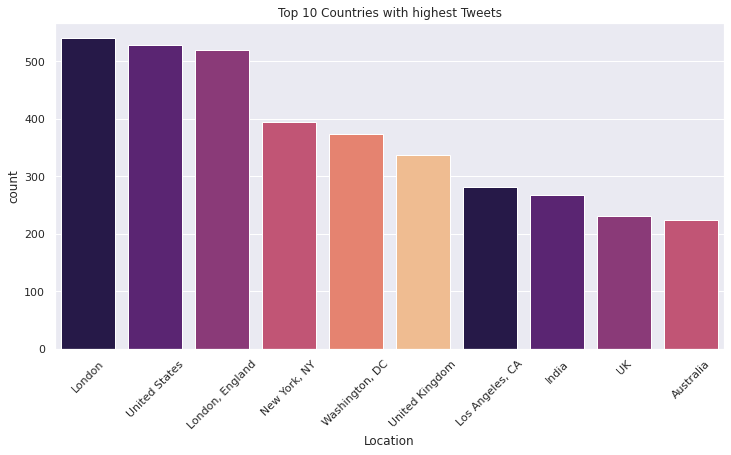

In [8]:
#Top 10 Countries that had the highest tweets
plt.figure(figsize=(12,6))
plt.title('Top 10 Countries with highest Tweets')
countries =sns.countplot(x='Location', data=train_data, order=train_data['Location'].value_counts().index[:10], palette=palette)
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.show() 

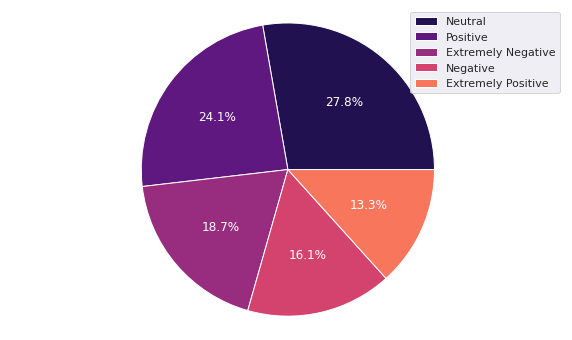

In [9]:
#Pie Chart for the Sentiments Percentage 
plt.figure(figsize=(10,6))
plt.pie(train_data['Sentiment'].value_counts(), labels=train_data['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

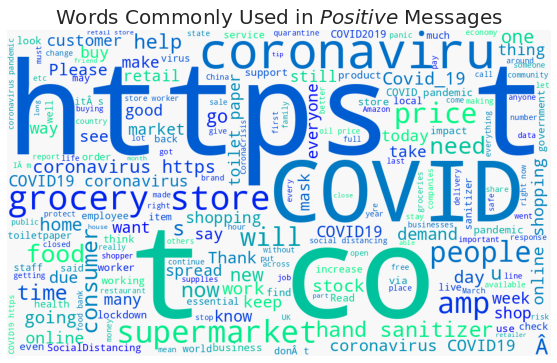

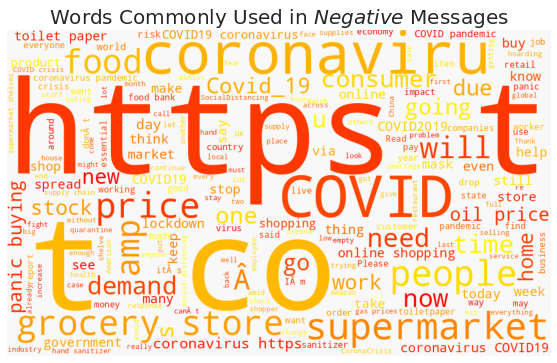

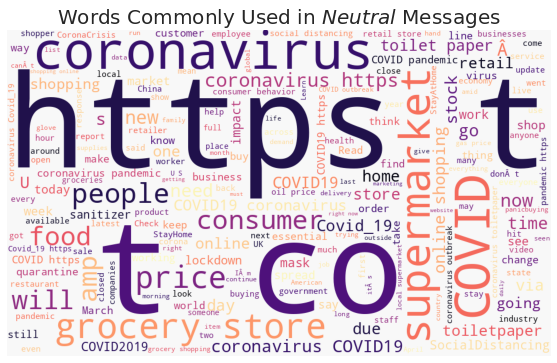

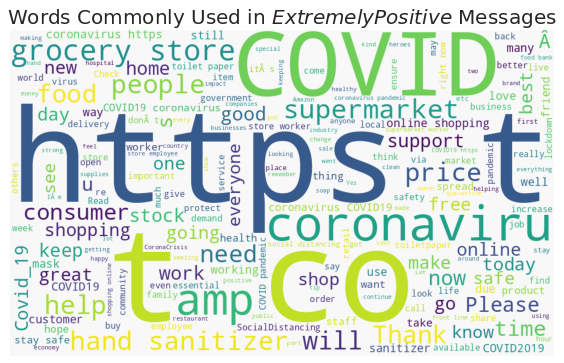

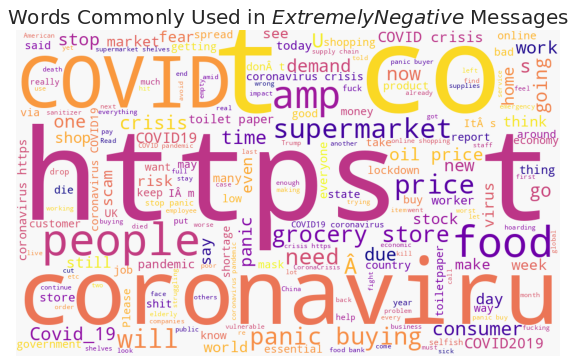

In [10]:
#WordCloud for the Sentiments
from wordcloud import WordCloud
for label, cmap in zip(['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative'],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = train_data.query('Sentiment == @label')['OriginalTweet'].str.cat(sep=' ')
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()

In [11]:
#Only intrested in the OriginalTweet and Sentiment Columns
train_df= train_data[['OriginalTweet','Sentiment']]
test_df= test_data[['OriginalTweet','Sentiment']]

train_df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


# **Preprocessing**

In [12]:
#Checking for null values
train_df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [13]:
test_df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [14]:
#Mapping the target column to {Negative/Neutral/Positive}
target_mapping={'Extremely Negative':0, 'Negative':0, 'Neutral':1,
                'Positive':2, 'Extremely Positive':2}
train_df['SentimentMapped']=train_df['Sentiment'].map(lambda x:target_mapping[x])
test_df['SentimentMapped']=test_df['Sentiment'].map(lambda x:target_mapping[x])

train_df.head()

,OriginalTweet,Sentiment,SentimentMapped
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,1
1,advice Talk to your neighbours family to excha...,Positive,2
2,Coronavirus Australia: Woolworths to give elde...,Positive,2
3,My food stock is not the only one which is emp...,Positive,2
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0


In [15]:
#Cleaning the text
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

def preprocessor(data):
    corpus = []
    for i in range(len(data)):
        #remove urls
        tweet1= re.sub(r'http\S+', ' ', data['OriginalTweet'][i])
        #remove html tags
        tweet2 = re.sub(r'<.*?>',' ', tweet1) 
        #remove digits
        tweet3 = re.sub(r'\d+',' ', tweet2)
        #remove hashtags
        tweet4 = re.sub(r'#\w+',' ', tweet3)
        review = re.sub('[^a-zA-Z]', ' ', tweet4)
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if word not in all_stopwords]
        review = ' '.join(review)
        corpus.append(review)
    return corpus   

In [16]:
#Transforming the OriginalTweet 
corpus_train=preprocessor(train_df)
corpus_test=preprocessor(test_df)

#Displaying the first 5 rows in corpus_train
corpus_train[0:5]

['menyrbi phil gahan chrisitv',
 'advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med not order',
 'coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak',
 'food stock not one empti pleas panic enough food everyon not take need stay calm stay safe franc',
 'readi go supermarket outbreak not paranoid food stock litterali empti seriou thing pleas panic caus shortag']

# **Bag of Words Model**

In [17]:
#Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000) #You will get 31750 columns if you dont specify max_features
X_train = cv.fit_transform(corpus_train).toarray()
y_train = train_df['SentimentMapped']
X_test = cv.transform(corpus_test).toarray()
y_test = test_df['SentimentMapped']

In [18]:
X_train.shape

(41157, 10000)

In [19]:
X_test.shape

(3798, 10000)

# **Final Model**

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=0, early_stopping=True, verbose=2)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.72491549
Validation score: 0.808066
Iteration 2, loss = 0.43149457
Validation score: 0.825316
Iteration 3, loss = 0.32868967
Validation score: 0.821186
Iteration 4, loss = 0.26256486
Validation score: 0.824344
Iteration 5, loss = 0.21005748
Validation score: 0.820943
Iteration 6, loss = 0.16796968
Validation score: 0.820457
Iteration 7, loss = 0.13382269
Validation score: 0.818756
Iteration 8, loss = 0.10612887
Validation score: 0.816812
Iteration 9, loss = 0.08401803
Validation score: 0.813168
Iteration 10, loss = 0.06622834
Validation score: 0.812682
Iteration 11, loss = 0.05182248
Validation score: 0.812439
Iteration 12, loss = 0.04209800
Validation score: 0.808066
Iteration 13, loss = 0.03527547
Validation score: 0.809524
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(early_stopping=True, random_state=0, verbose=2)

MLP Accuracy: 0.8101632438125329
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1633
           1       0.73      0.74      0.74       619
           2       0.81      0.85      0.83      1546

    accuracy                           0.81      3798
   macro avg       0.79      0.80      0.80      3798
weighted avg       0.81      0.81      0.81      3798



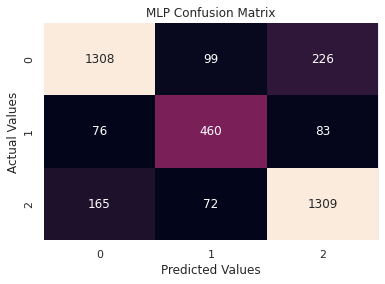

In [21]:
y_pred_mlp=mlp.predict(X_test)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print('MLP Accuracy:', accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()
#MLP Training Accuracy: 0.9015477318560634
#MLP Testing  Accuracy: 0.8101632438125329